1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [138]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [139]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [140]:
df['target']=iris.target
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


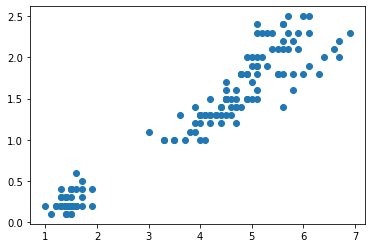

In [141]:
%matplotlib inline
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [142]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
pred = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [143]:
cent = km.cluster_centers_
cent

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [144]:
df['pred']=pred
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name,pred
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,0
146,6.3,2.5,5.0,1.9,2,virginica,0
147,6.5,3.0,5.2,2.0,2,virginica,0
148,6.2,3.4,5.4,2.3,2,virginica,0


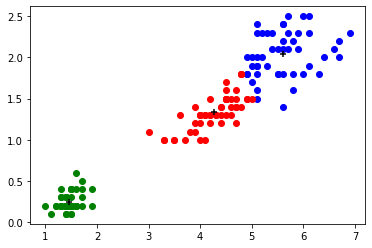

In [145]:
plt.scatter(df[df.pred==0]['petal length (cm)'],df[df.pred==0]['petal width (cm)'],color='blue')
plt.scatter(df[df.pred==1]['petal length (cm)'],df[df.pred==1]['petal width (cm)'],color='green')
plt.scatter(df[df.pred==2]['petal length (cm)'],df[df.pred==2]['petal width (cm)'],color='red')
plt.scatter(cent[:,0],cent[:,1], color='black',marker='+')

In [146]:
df['target'].groupby(df['pred']).count()


pred
0    48
1    50
2    52
Name: target, dtype: int64

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [148]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name,pred
0,5.1,3.5,0.067797,0.041667,0,setosa,1
1,4.9,3.0,0.067797,0.041667,0,setosa,1
2,4.7,3.2,0.050847,0.041667,0,setosa,1
3,4.6,3.1,0.084746,0.041667,0,setosa,1
4,5.0,3.6,0.067797,0.041667,0,setosa,1


In [149]:
km = KMeans(n_clusters=3)
pred_n = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
pred_n

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [150]:
df.drop('pred',axis=1, inplace=True)
df['pred_n']=pred_n
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name,pred_n
0,5.1,3.5,0.067797,0.041667,0,setosa,1
1,4.9,3.0,0.067797,0.041667,0,setosa,1
2,4.7,3.2,0.050847,0.041667,0,setosa,1
3,4.6,3.1,0.084746,0.041667,0,setosa,1
4,5.0,3.6,0.067797,0.041667,0,setosa,1


In [151]:
cent_n = km.cluster_centers_
cent_n

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

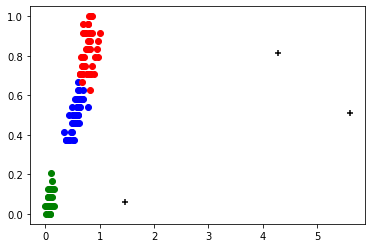

In [152]:
plt.scatter(df[df.pred_n==0]['petal length (cm)'],df[df.pred_n==0]['petal width (cm)'],color='blue')
plt.scatter(df[df.pred_n==1]['petal length (cm)'],df[df.pred_n==1]['petal width (cm)'],color='green')
plt.scatter(df[df.pred_n==2]['petal length (cm)'],df[df.pred_n==2]['petal width (cm)'],color='red')
plt.scatter(cent[:,0],cent_n[:,1], color='black',marker='+')

In [153]:
df['target'].groupby(df['pred_n']).count()

pred_n
0    52
1    50
2    48
Name: target, dtype: int64

In [156]:
sse=[]
for k in range(1,11):
    km=KMeans()
    km.fit_predict(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'sum square error')

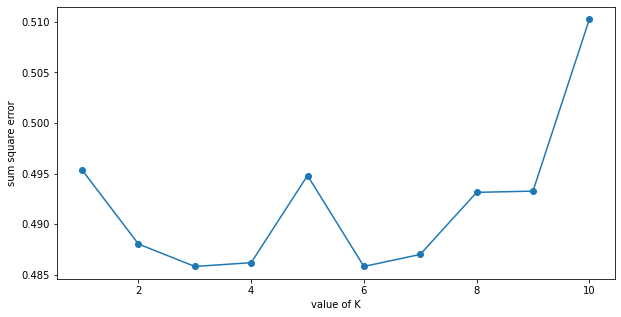

In [157]:
plt.figure(figsize=(10,5))
plt.scatter(range(1,11),sse)
plt.plot(range(1,11),sse)
plt.xlabel('value of K')
plt.ylabel('sum square error')